# Exploratory Data Analysis
This project will be using stock market data via [alpaca.markets](https://alpaca.markets/). We are currently going to explore oil stocks and potential correlations between them and renewable energy stocks, as well as looking at how geopolitical events have affected them.

Direction: Check out comparison and correlation of stocks among different time periods, including comparisons to the general market overall. Do a t-test to compare average volume between two stocks over a year (or two markets)

### Yahoo Finance Python API Wrapper
Here we use a Yahoo Finance wrapper to easily access their API and pull in data on certain stocks, markets, and commodities

In [34]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import pearsonr

sns.set_theme(style="whitegrid")

In [53]:
# get stock and market data
exxon_5y = yf.download('XOM', '2018-01-01', '2023-01-01').reset_index()
nextera_5y = yf.download("NEE", '2018-01-01', '2023-01-01').reset_index()
tesla_5y = yf.download("TSLA", '2018-01-01', '2023-01-01').reset_index()
icln_5y = yf.download("ICLN", '2018-01-01', '2023-01-01').reset_index()
uso_5y = yf.download("USO", '2018-01-01', '2023-01-01').reset_index()
nasdaq_5y = yf.download("^IXIC", '2018-01-01', '2023-01-01').reset_index()
gold_5y = yf.download("GC=F", '2018-01-01', '2023-01-01').reset_index()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Data Trends

First, we'll look at a comparison of the oil and clean energy etfs over the past 5 years.

Text(0, 0.5, 'Price per Share $')

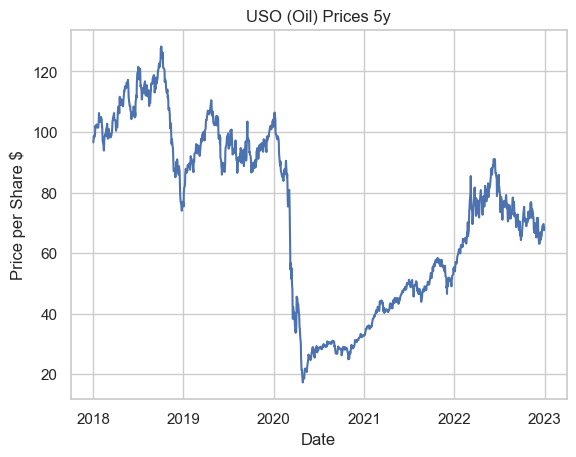

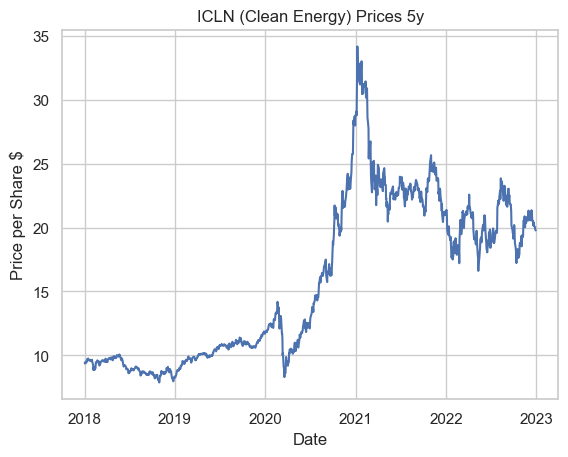

In [61]:
sns.lineplot(uso_5y, x="Date", y="Open")
plt.title("USO (Oil) Prices 5y")
plt.ylabel("Price per Share $")

plt.figure()

sns.lineplot(icln_5y, x="Date", y="Open")
plt.title("ICLN (Clean Energy) Prices 5y")
plt.ylabel("Price per Share $")

In [68]:
cor_5y = pearsonr(uso_5y["Open"], icln_5y["Open"])
print(f"The correlation between USO and ICLN over the past 5 years is {round(cor_5y[0], 3)} with a p-value of {round(cor_5y[1], 3)}.")

The correlation between USO and ICLN over the past 5 years is -0.653 with a p-value of 0.0.


Now we'll compare them just in 2022.

In [60]:
uso_1y = uso_5y.loc[uso_5y["Date"] > np.datetime64("2022-01-01")]
icln_1y = icln_5y.loc[icln_5y["Date"] > np.datetime64("2022-01-01")]

Text(0, 0.5, 'Price per Share $')

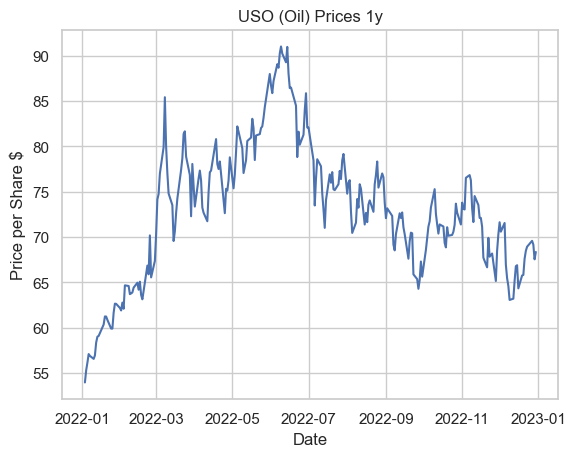

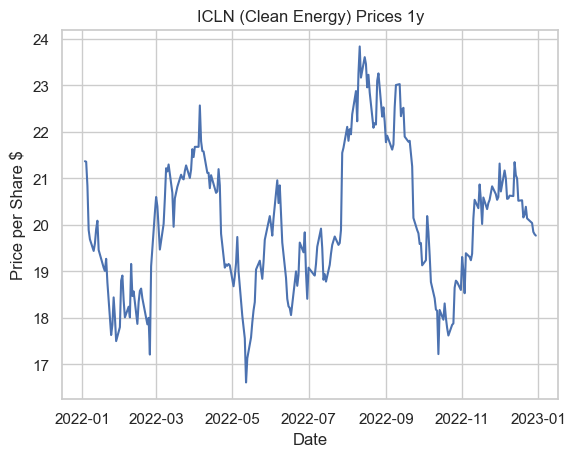

In [62]:
sns.lineplot(uso_1y, x="Date", y="Open")
plt.title("USO (Oil) Prices 1y")
plt.ylabel("Price per Share $")

plt.figure()

sns.lineplot(icln_1y, x="Date", y="Open")
plt.title("ICLN (Clean Energy) Prices 1y")
plt.ylabel("Price per Share $")

In [69]:
cor_1y = pearsonr(uso_1y["Open"], icln_1y["Open"])
print(f"The correlation between USO and ICLN over 2022 is {round(cor_1y[0], 3)} with a p-value of {round(cor_1y[1], 3)}.")

The correlation between USO and ICLN over 2022 is 0.043 with a p-value of 0.495.


# Below here is random stuff not to be submitted

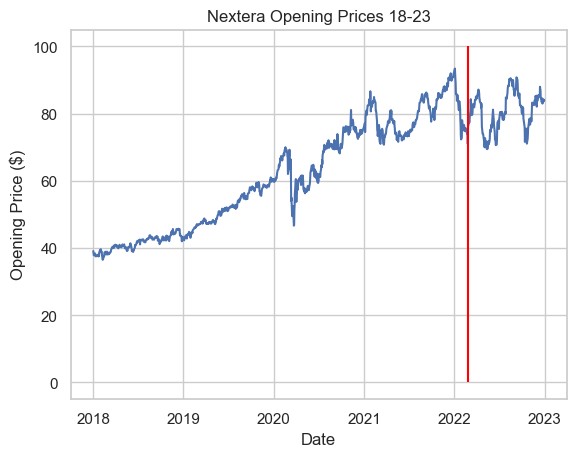

In [29]:
sns.lineplot(data=nextera, x="Date", y="Open")
plt.title("Nextera Opening Prices 18-23")
plt.ylabel("Opening Price ($)")
# plt.vlines(x=np.datetime64("2022-02-24"), ymin=0, ymax=100, colors="red")

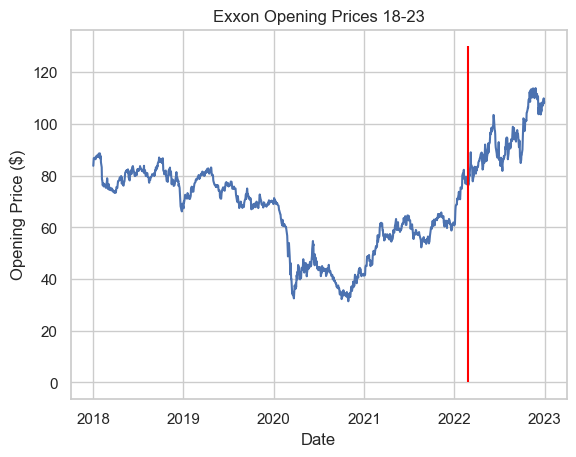

In [24]:
sns.lineplot(data=exxon, x="Date", y="Open")
plt.title("Exxon Opening Prices 18-23")
plt.ylabel("Opening Price ($)")
# plt.vlines(x=np.datetime64("2022-02-24"), ymin=0, ymax=130, colors="red")

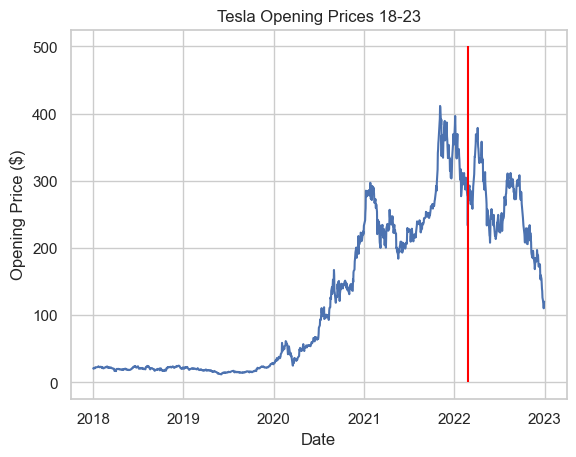

In [21]:
sns.lineplot(data=tesla, x="Date", y="Open")
plt.title("Tesla Opening Prices 18-23")
plt.ylabel("Opening Price ($)")
# plt.vlines(x=np.datetime64("2022-02-24"), ymin=0, ymax=500, colors="red")

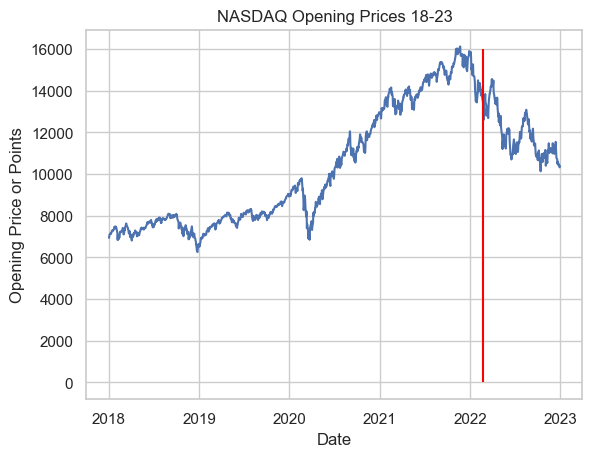

In [31]:
sns.lineplot(data=nasdaq, x="Date", y="Open")
plt.title("NASDAQ Opening Prices 18-23")
plt.ylabel("Opening Price or Points")
# plt.vlines(x=np.datetime64("2022-02-24"), ymin=0, ymax=16000, colors="red")

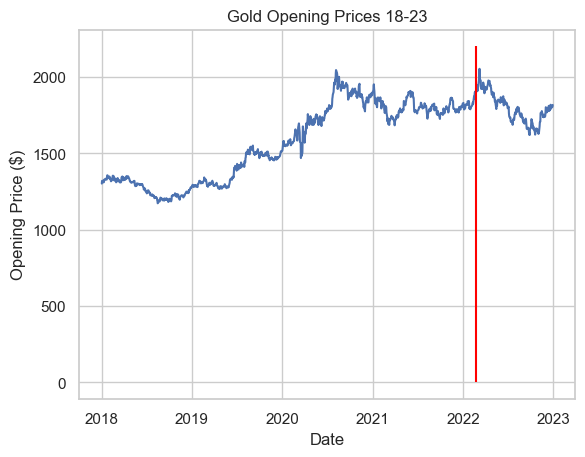

In [33]:
sns.lineplot(data=gold, x="Date", y="Open")
plt.title("Gold Opening Prices 18-23")
plt.ylabel("Opening Price ($)")
# plt.vlines(x=np.datetime64("2022-02-24"), ymin=0, ymax=2200, colors="red")